In [3]:
import mne
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



In [3]:
file = "SC4002E0-PSG.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /Users/tomiriszhaksylyk/Downloads/Sleep-Stage-Classification-master/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [4]:
len(raw_data[0])
# channels
# info
# raw_data[-1]

8490000

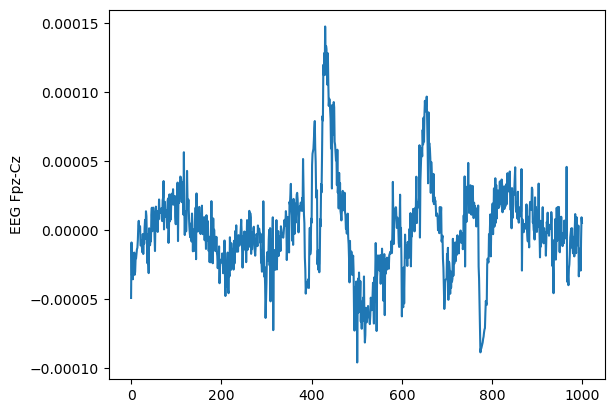

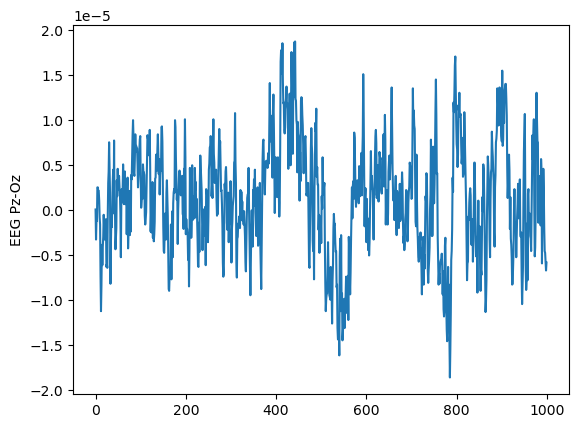

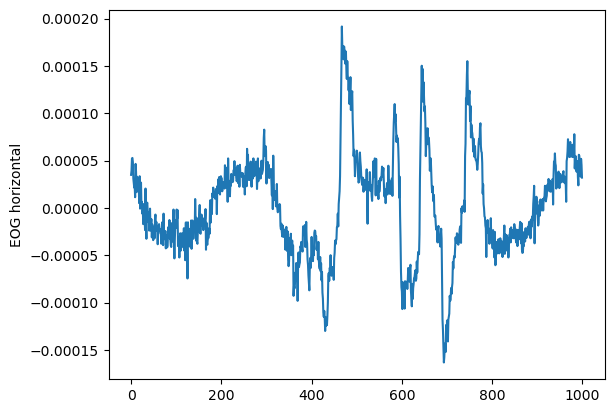

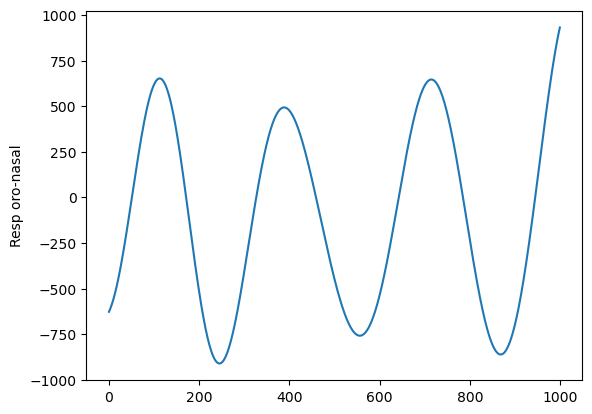

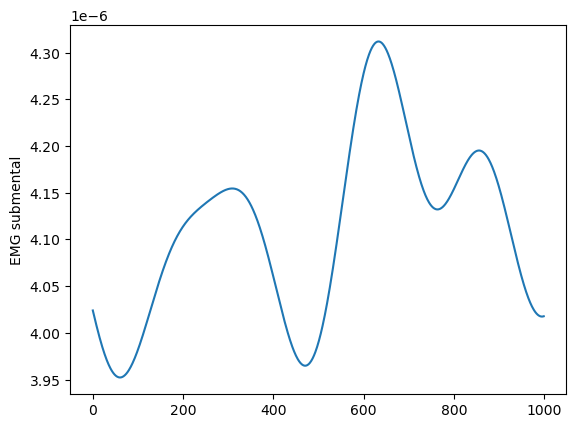

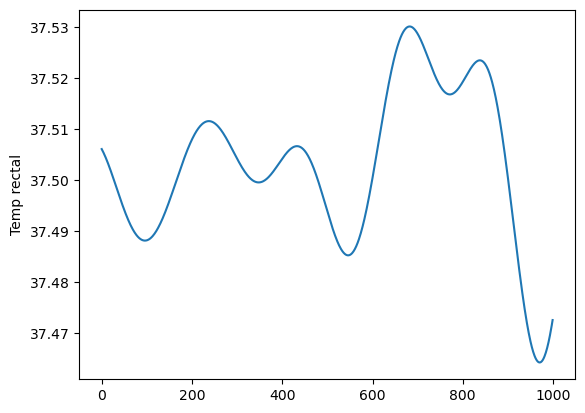

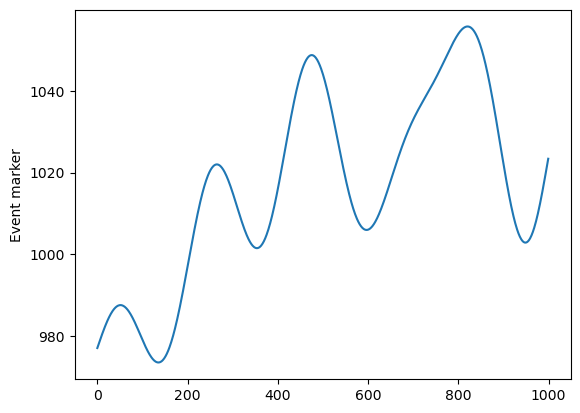

In [5]:
for i, elem in enumerate(channels):
    plt.plot(raw_data[i][:1000])
    plt.ylabel(elem)
    plt.show()

In [6]:
file = "SC4002EC-Hypnogram.edf"
anot = mne.read_annotations(file)
# raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
# info = data.info
# channels = data.ch_names


for i in range(len(anot)):
    print(i, anot[i])


0 OrderedDict([('onset', 0.0), ('duration', 26070.0), ('description', 'Sleep stage W'), ('orig_time', None)])
1 OrderedDict([('onset', 26070.0), ('duration', 90.0), ('description', 'Sleep stage 1'), ('orig_time', None)])
2 OrderedDict([('onset', 26160.0), ('duration', 510.0), ('description', 'Sleep stage 2'), ('orig_time', None)])
3 OrderedDict([('onset', 26670.0), ('duration', 270.0), ('description', 'Sleep stage 3'), ('orig_time', None)])
4 OrderedDict([('onset', 26940.0), ('duration', 1140.0), ('description', 'Sleep stage 4'), ('orig_time', None)])
5 OrderedDict([('onset', 28080.0), ('duration', 30.0), ('description', 'Movement time'), ('orig_time', None)])
6 OrderedDict([('onset', 28110.0), ('duration', 120.0), ('description', 'Sleep stage 3'), ('orig_time', None)])
7 OrderedDict([('onset', 28230.0), ('duration', 30.0), ('description', 'Sleep stage 4'), ('orig_time', None)])
8 OrderedDict([('onset', 28260.0), ('duration', 30.0), ('description', 'Sleep stage 3'), ('orig_time', None)

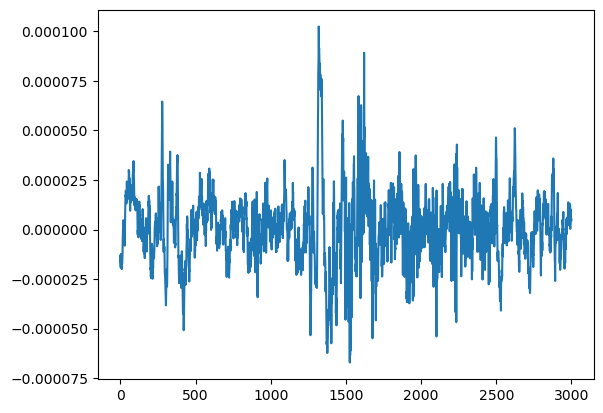

In [7]:
target = anot[148]

start = int(target['onset'] * 100)
end = int(start + target['duration'] * 100)
plt.plot(raw_data[0][start:end])
plt.show()

In [8]:
def get_stages(stage):
    res = []
    for i in range(len(anot)):
        if stage in anot[i]['description']:
            target = anot[i]
            start = int(target['onset'] * 100)
            end = int(start + target['duration'] * 100)
            res.append(start)
    return res

first = get_stages('1')
second = get_stages('2')
third = get_stages('3')
fourth = get_stages('4')
rem = get_stages('R')

min_len = min(len(rem), len(fourth))

target = fourth

for i in range(len(target)):
    table = []
    
    table.append(np.array(raw_data[0][target[i]:target[i] + 2500]))
    table.append(np.array(raw_data[1][target[i]:target[i] + 2500]))
    table.append(np.array(raw_data[2][target[i]:target[i] + 2500]))
    
    table = np.array(table)
    weight = 2500
    channel = 1
    img_numpy = table
    img_numpy = np.reshape(table,(60,125))

    img = Image.fromarray(img_numpy, "RGB")
    img.save("dataset/fourth/{}.jpg".format(i))
#     img.show()

#     print(table)
    
    
#     print(raw_data[0][first[i]:first[i] + 2500], len(raw_data[0][first[i]:first[i] + 2500]))
#     print(raw_data[0][second[i]:second[i] + 2500], len(raw_data[0][second[i]:second[i] + 2500]))
    
#     plt.plot(raw_data[0][first[i]:first[i] + 2500], color='b')
#     plt.plot(raw_data[0][second[i]:second[i] + 2500], color='g')
#     plt.plot(raw_data[0][third[i]:third[i] + 2500], color='b')
#     plt.plot(raw_data[0][fourth[i]:fourth[i] + 2500], color='y')
#     plt.plot(raw_data[0][rem[i]:rem[i] + 2500], color='m')
    
#     plt.show()
#         plt.plot(raw_data[0][start:start+2000])
#         plt.show()

In [9]:
mx = raw_data[0].max()
raw_data[0]

array([-4.89391941e-05, -8.71575092e-06, -3.25443223e-05, ...,
        2.72307692e-05,  5.12630037e-05,  6.27699634e-05])

In [15]:
# raw_data[0] = raw_data[0] / mx
# raw_data[0]

In [10]:
height = 3
weight = 2500
channel = 1
img_numpy = table
img_numpy = np.reshape(table,(30,250))

img = Image.fromarray(img_numpy, "RGB")
img.show()


In [43]:

def get_stages(stage):
    res = []
    for i in range(len(anot)):
        if stage in anot[i]['description']:
            target = anot[i]
            start = int(target['onset'] * 100)
            end = int(start + target['duration'] * 100)
            res.append(start)
    return res

first = get_stages('1')
second = get_stages('2')
third = get_stages('3')
fourth = get_stages('4')
rem = get_stages('R')

min_len = min(len(rem), len(fourth))


for i in range(min_len):
    table = []
    
    table.append(np.array(raw_data[0][rem[i]:rem[i] + 2500]))
    table.append(np.array(raw_data[1][rem[i]:rem[i] + 2500]))
    table.append(np.array(raw_data[2][rem[i]:rem[i] + 2500]))
    
    table = np.array(table)
    print(table)
    
    
#     print(raw_data[0][first[i]:first[i] + 2500], len(raw_data[0][first[i]:first[i] + 2500]))
#     print(raw_data[0][second[i]:second[i] + 2500], len(raw_data[0][second[i]:second[i] + 2500]))
    
#     plt.plot(raw_data[0][first[i]:first[i] + 2500], color='b')
#     plt.plot(raw_data[0][second[i]:second[i] + 2500], color='g')
#     plt.plot(raw_data[0][third[i]:third[i] + 2500], color='b')
#     plt.plot(raw_data[0][fourth[i]:fourth[i] + 2500], color='y')
#     plt.plot(raw_data[0][rem[i]:rem[i] + 2500], color='m')
    
#     plt.show()
#         plt.plot(raw_data[0][start:start+2000])
#         plt.show()

[[ 8.39194139e-06  1.07340659e-05  8.79926740e-06 ... -5.76263736e-06
  -6.78095238e-06 -1.68622711e-05]
 [ 2.81611722e-06 -2.48498168e-06 -4.25201465e-06 ...  9.88424908e-06
   1.62652015e-05  2.22534799e-05]
 [-6.97557998e-06 -6.01098901e-06  7.41147741e-07 ...  1.47277167e-05
   8.45787546e-06  8.94017094e-06]]
[[ 7.88278388e-06  1.09377289e-05  1.11413919e-05 ...  3.62937729e-05
   4.00615385e-05  3.89413919e-05]
 [ 1.04908425e-06 -3.07399267e-06 -6.11721612e-06 ...  4.09230769e-06
   3.69963370e-06  5.85934066e-06]
 [-1.61391941e-05 -1.32454212e-05 -1.32454212e-05 ...  3.15262515e-06
   3.63492063e-06  5.08180708e-06]]
[[-1.53347985e-05 -1.82879121e-05 -1.64549451e-05 ... -1.56402930e-05
  -1.51311355e-05 -1.23816850e-05]
 [ 5.85934066e-06  5.46666667e-06  4.48498168e-06 ...  5.07399267e-06
   8.11721612e-06  6.64468864e-06]
 [-9.38705739e-06 -1.18803419e-06  7.41147741e-07 ...  3.63492063e-06
   3.15262515e-06  6.04639805e-06]]
[[-1.13633700e-05 -9.32673993e-06 -1.34000000e-05 ..

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Set the path to your dataset directory
dataset_dir = "./dataset_cz"

# Set the image size and batch size
image_size = (60, 125)
batch_size = 32

# Create ImageDataGenerators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(dataset_dir, target_size=image_size, batch_size=batch_size, class_mode="categorical", subset="training")
validation_generator = train_datagen.flow_from_directory(dataset_dir, target_size=image_size, batch_size=batch_size, class_mode="categorical", subset="validation")

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=image_size + (3,))

# Add custom layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation="softmax")(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model


model.compile(optimizer=Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(train_generator, epochs=175, validation_data=validation_generator)

# Save the model
model.save("my_custom_cnn.h5")


Found 103 images belonging to 5 classes.
Found 24 images belonging to 5 classes.


/Users/tomiriszhaksylyk/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-05-04 15:45:44.210108: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/175
4/4 [==============================] - 3s 544ms/step - loss: 1.8200 - accuracy: 0.2330 - val_loss: 1.5503 - val_accuracy: 0.2500
Epoch 2/175
4/4 [==============================] - 2s 418ms/step - loss: 1.8149 - accuracy: 0.2233 - val_loss: 1.5010 - val_accuracy: 0.2917
Epoch 3/175
4/4 [==============================] - 2s 417ms/step - loss: 1.7309 - accuracy: 0.2233 - val_loss: 1.4998 - val_accuracy: 0.2917
Epoch 4/175
4/4 [==============================] - 2s 419ms/step - loss: 1.6719 - accuracy: 0.2816 - val_loss: 1.5124 - val_accuracy: 0.2917
Epoch 5/175
4/4 [==============================] - 2s 416ms/step - loss: 1.6018 - accuracy: 0.3398 - val_loss: 1.5129 - val_accuracy: 0.2917
Epoch 6/175
4/4 [==============================] - 2s 420ms/step - loss: 1.6880 - accuracy: 0.2524 - val_loss: 1.4959 - val_accuracy: 0.2917
Epoch 7/175
4/4 [==============================] - 2s 519ms/step - loss: 1.6312 - accuracy: 0.2330 - val_loss: 1.4905 - val_accuracy: 0.3333
Epoch 8/175
4

In [26]:
model.history["accuracy"]

TypeError: 'History' object is not subscriptable

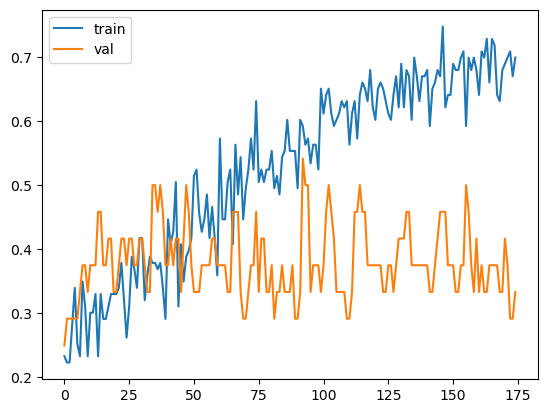

In [4]:
plt.plot(history.history["accuracy"])

plt.plot(history.history["val_accuracy"])
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
import tensorflow as tf
print(tf.__version__)